# Providing more metadata when creating a run

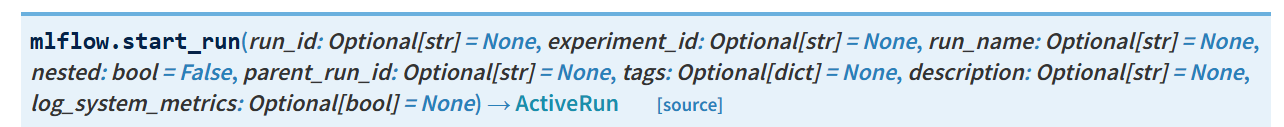

In [10]:
import mlflow 

#Providing a run id will try to resume a run with that id.

try:
    with mlflow.start_run(run_id="some-random-id"):
        pass 
except Exception as e:
    print(e)
    

Run 'some-random-id' not found


In [11]:
# Get experiment id from mlruns directory
experiment_id = ""
try:


    with mlflow.start_run(experiment_id = experiment_id) as run:
        pass

    
except Exception as e:
    print(e)

Invalid experiment ID: ''


In [12]:
# Provide run name
with mlflow.start_run(run_name="my-run") as run:
    pass

run = mlflow.last_active_run()
print("Run Name: ", run.info.run_name)


Run Name:  my-run


In [13]:
# Providing tags
with mlflow.start_run(tags={"my-tag": "tag-value"}) as run:
    pass

run = mlflow.last_active_run()
run.data.tags

{'mlflow.runName': 'peaceful-turtle-952',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue',
 'my-tag': 'tag-value'}

In [14]:
# Providing a description
with mlflow.start_run(description="This is a testing run") as run:
    print("WITHIN CONTEXT")


print("OUTSIDE CONTEXT")
run = mlflow.last_active_run()
print(run.info.to_proto())
print(run.data.to_dictionary())

WITHIN CONTEXT
OUTSIDE CONTEXT
run_id: "a755827da31e47b9b10dc78ee8ca502f"
run_uuid: "a755827da31e47b9b10dc78ee8ca502f"
run_name: "zealous-loon-112"
experiment_id: "0"
user_id: "manue"
status: FINISHED
start_time: 1737426495907
end_time: 1737426495927
artifact_uri: "file:///c:/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/notebooks/mlruns/0/a755827da31e47b9b10dc78ee8ca502f/artifacts"
lifecycle_stage: "active"

{'metrics': {}, 'params': {}, 'tags': {'mlflow.note.content': 'This is a testing run', 'mlflow.runName': 'zealous-loon-112', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


In [6]:
# Log system metrics
with mlflow.start_run(log_system_metrics=True) as run:
    pass 

run = mlflow.last_active_run()
print(run.data.metrics)

2025/01/20 07:56:21 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: `pynvml` is not installed, to log GPU metrics please run `pip install pynvml` to install it..
2025/01/20 07:56:21 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/01/20 07:56:21 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/01/20 07:56:21 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


{}


# Update run tags

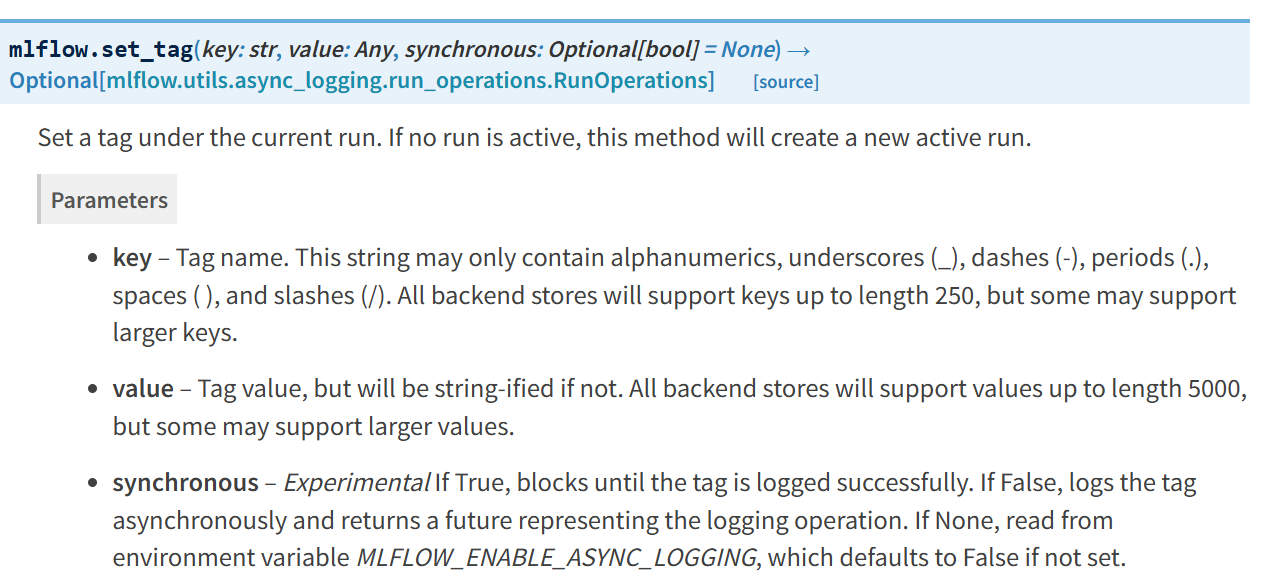

In [15]:
import mlflow

with mlflow.start_run() as run:
    mlflow.set_tag("my-tag", "tag-value")

run = mlflow.last_active_run()
run.data.tags

{'mlflow.runName': 'industrious-auk-671',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue',
 'my-tag': 'tag-value'}

In [17]:
# Resume the previous run and update the tag
with mlflow.start_run(run.info.run_id) as run:
    mlflow.set_tag("my-tag", "tag-value UPDATED")

run = mlflow.last_active_run()
run.data.tags

{'mlflow.runName': 'industrious-auk-671',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue',
 'my-tag': 'tag-value UPDATED'}

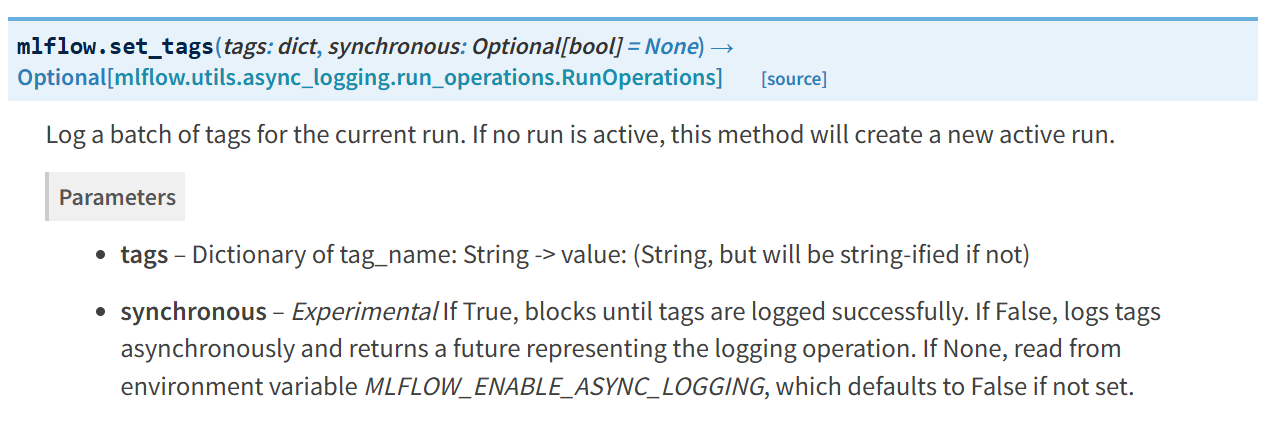

In [18]:
# Resume the previous run and update the tag
with mlflow.start_run(run.info.run_id) as run:
    mlflow.set_tags({
        "my-tag": "tag-value UPDATED AGAIN",
        "my-tag2": "tag-value2"
    })

run = mlflow.last_active_run()
run.data.tags

{'mlflow.runName': 'industrious-auk-671',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue',
 'my-tag': 'tag-value UPDATED AGAIN',
 'my-tag2': 'tag-value2'}

# Set Tags using the client

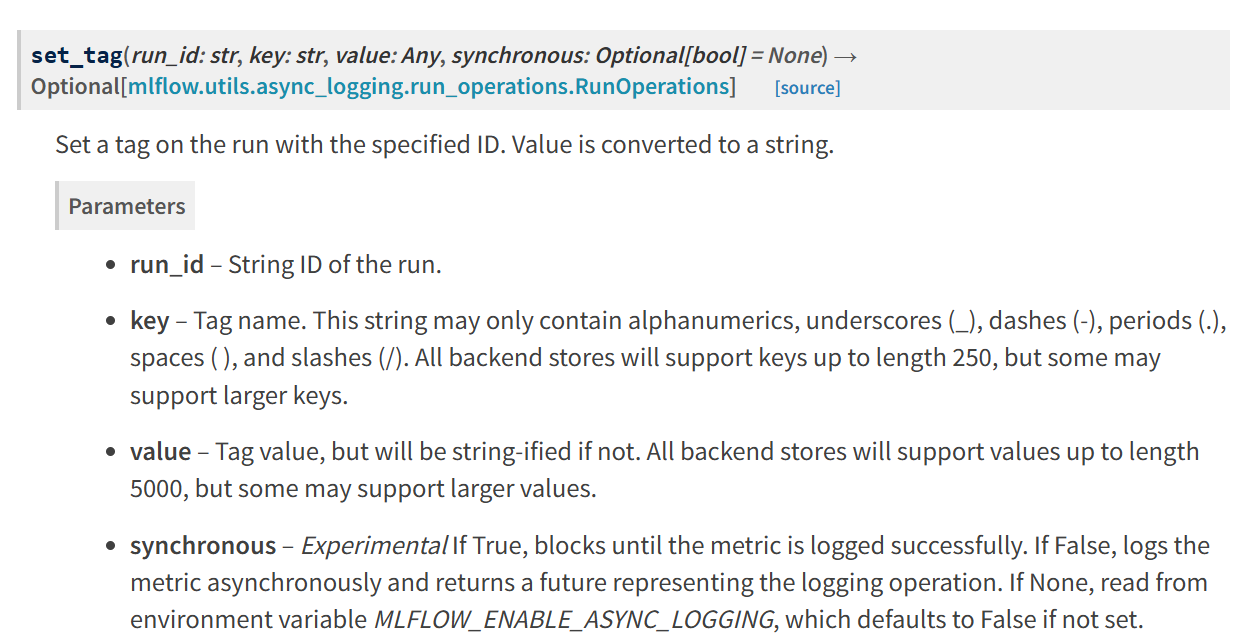

In [19]:
# get the mlflow client
client = mlflow.MlflowClient()

# Set a tag using the client
client.set_tag(run.info.run_id, "my-tag", "tag-value UPDATED USING CLIENT")
client.set_tag(run.info.run_id, "client-tag", "client-tag-value")

run = mlflow.last_active_run()
run.data.tags


{'client-tag': 'client-tag-value',
 'mlflow.runName': 'industrious-auk-671',
 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'manue',
 'my-tag': 'tag-value UPDATED USING CLIENT',
 'my-tag2': 'tag-value2'}